<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" alt="THE NORTH FACE LOGO" width="50%" />

# The North Face e-commerce : boosting online sales !

<b> PROJECT THE NORTH FACE E-COMMERCE

In [1]:
#importons les librairies nécessaires 
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('/home/jovyan/FULLSTACK/MOD5_UNSUPERVISE/PROJECT/NORTHFACE/sample-data.xls')
dataset.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [3]:
#regardons un exemple d'une description de produit
print(dataset.loc[1,'description'])

Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Progr

In [4]:
#spacy est une bibliothèque python pour le traitement naturel du langage
!pip install spacy -q

In [5]:
#le texte est en anglais donc nous importons le langage approprié
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
#wordcloud permet de créer un nuage de mots
!pip install wordcloud -q

In [7]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import wordcloud

<B>1-TEXT PREPROCESSING

In [8]:
#on importe re si on a besoin de faire des regex
import re

In [9]:
#nous allons créer une nouvelle colonne de texte nettoyé à notre dataset
#on enlève la ponctuation, les chiffres et les majuscules
dataset['clean_description'] = dataset['description'].str.replace(r"<[a-z/]+>", " ") 

dataset['clean_description'] = dataset['clean_description'].str.replace(r"[^A-Za-z0-9 ]+", " ") 
dataset['clean_description'] = dataset['clean_description'].str.replace(r"[^A-Za-z]+", " ") 
dataset['clean_description'] = dataset['clean_description'].fillna('').apply(lambda x: x.lower())
dataset

/tmp/ipykernel_142/1938976009.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_description'] = dataset['description'].str.replace(r"<[a-z/]+>", " ")
/tmp/ipykernel_142/1938976009.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_description'] = dataset['clean_description'].str.replace(r"[^A-Za-z0-9 ]+", " ")
/tmp/ipykernel_142/1938976009.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['clean_description'] = dataset['clean_description'].str.replace(r"[^A-Za-z]+", " ")


,id,description,clean_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...
...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap bottoms cut loose from the maddening crowd...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap crew this crew takes the edge off fickle w...
497,498,All-time shell - No need to use that morning T...,all time shell no need to use that morning tim...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all wear cargo shorts all wear cargo shorts ba...


In [10]:
print(dataset.loc[1,'description'])

Active sport boxer briefs - Skinning up Glory requires enough movement without your boxers deciding to poach their own route. The form-fitting Active Sport Boxer Briefs are made from breathable 93% polyester (71% recycled) fabric that's fast-wicking, dries quickly and has 7% spandex for stretch; the seamless waistband and soft leg edges won't roll or bind. The gusseted, flat-sewn 6" inseam (size M) is offset to prevent inner-thigh chafe. Fly-free with a smooth front panel. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently, dries fast"</li> <li>Seamless construction</li> <li>"Flat-sewn, gusseted inseam is set forward to prevent inner-thigh chafe"</li> <li>Fly-free support</li> <li>"Inseam (size M) is 6"""</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Progr

In [11]:
print(dataset.loc[1,'clean_description'])

active sport boxer briefs skinning up glory requires enough movement without your boxers deciding to poach their own route the form fitting active sport boxer briefs are made from breathable polyester recycled fabric that s fast wicking dries quickly and has spandex for stretch the seamless waistband and soft leg edges won t roll or bind the gusseted flat sewn inseam size m is offset to prevent inner thigh chafe fly free with a smooth front panel recyclable through the common threads recycling program details stretch mesh provides support open weave mesh for airflow wicks efficiently dries fast seamless construction flat sewn gusseted inseam is set forward to prevent inner thigh chafe fly free support inseam size m is fabric oz polyester recycled spandex with moisture wicking performance recyclable through the common threads recycling program weight g oz made in israel 


In [12]:
dataset.head()

,id,description,clean_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...


In [13]:
#nous allons ensuite créer un objet nlp avec la langue anglais que nous avons téléchargé en_core_web_sm.load
nlp = en_core_web_sm.load()


In [14]:
#on enleve les english stopwords du texte nettoyé et on crée des tokens

from spacy.lang.en.stop_words import STOP_WORDS

dataset["tokenized_description"] = dataset["clean_description"].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])
dataset.head()

,id,description,clean_description,tokenized_description
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a..."


In [15]:
print(dataset.loc[1,'tokenized_description'])

['active', 'sport', 'boxer', 'brief', 'skin', 'glory', 'require', 'movement', 'boxer', 'decide', 'poach', 'route', 'form', 'fit', 'active', 'sport', 'boxer', 'brief', 'breathable', 'polyester', 'recycle', 'fabric', 's', 'fast', 'wicking', 'dry', 'quickly', 'spandex', 'stretch', 'seamless', 'waistband', 'soft', 'leg', 'edge', 'win', 't', 'roll', 'bind', 'gussete', 'flat', 'sew', 'inseam', 'size', 'm', 'offset', 'prevent', 'inner', 'thigh', 'chafe', 'fly', 'free', 'smooth', 'panel', 'recyclable', 'common', 'thread', 'recycle', 'program', 'detail', 'stretch', 'mesh', 'provide', 'support', 'open', 'weave', 'mesh', 'airflow', 'wick', 'efficiently', 'dry', 'fast', 'seamless', 'construction', 'flat', 'sew', 'gusseted', 'inseam', 'set', 'forward', 'prevent', 'inner', 'thigh', 'chafe', 'fly', 'free', 'support', 'inseam', 'size', 'm', 'fabric', 'oz', 'polyester', 'recycle', 'spandex', 'moisture', 'wicke', 'performance', 'recyclable', 'common', 'thread', 'recycle', 'program', 'weight', 'g', 'oz',

In [16]:
# nous allons ensuite rassembler les tokens en une phrase
detokenized_doc = []
for sentence in dataset["tokenized_description"]:
    t = ' '.join(sentence)
    detokenized_doc.append(t)

dataset['nlp_ready'] = detokenized_doc
dataset.head()

,id,description,clean_description,tokenized_description,nlp_ready
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


In [17]:
dataset.shape

(500, 5)

Nous allons ensuite utiliser une mesure statistique le TF-IDF (term frequency-inverse document frequency) qui évalue dans quelle mesure un mot dans un document est pertinent dans tous les documents.
On multiplie de mesures : combien de fois un mot apparaît dans le document par l'inverse de la fréquence de l'apparition du mot parmi le set de document


In [18]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(dataset['nlp_ready'])
X

<500x3529 sparse matrix of type '<class 'numpy.float64'>'
	with 32920 stored elements in Compressed Sparse Row format>

In [19]:
dense = X.toarray()
dense.shape

(500, 3529)

In [20]:
sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse = True)[:50]

[('zone', 3528),
 ('zips', 3527),
 ('zipping', 3526),
 ('zippered', 3525),
 ('zipper', 3524),
 ('zip', 3523),
 ('zinger', 3522),
 ('yvon', 3521),
 ('young', 3520),
 ('yosemite', 3519),
 ('yoke', 3518),
 ('yoga', 3517),
 ('yield', 3516),
 ('yerian', 3515),
 ('year', 3514),
 ('yarns', 3513),
 ('yarn', 3512),
 ('yard', 3511),
 ('yak', 3510),
 ('wyoming', 3509),
 ('wyome', 3508),
 ('www', 3507),
 ('wroblewski', 3506),
 ('wristband', 3505),
 ('wrist', 3504),
 ('wrinkling', 3503),
 ('wrinkle', 3502),
 ('wraparound', 3501),
 ('wrap', 3500),
 ('woven', 3499),
 ('worthy', 3498),
 ('worth', 3497),
 ('worn', 3496),
 ('world', 3495),
 ('workshirt', 3494),
 ('workout', 3493),
 ('workhorse', 3492),
 ('work', 3491),
 ('word', 3490),
 ('woolen', 3489),
 ('wool', 3488),
 ('wooden', 3487),
 ('wood', 3486),
 ('wonder', 3485),
 ('won', 3484),
 ('woman', 3483),
 ('wobble', 3482),
 ('withstand', 3481),
 ('wispy', 3480),
 ('wish', 3479)]

In [21]:
tfid_df = pd.DataFrame(dense, 
             columns=vectorizer.get_feature_names(), 
             index=["item_{}".format(x+1) for x in range(dataset.shape[0])] )

tfid_df.head()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zips,zone
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.146977,0.185483,0.0,0.0,0.0
item_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142438,0.000000,0.0,0.0,0.0


Dans ce dataset, chaque ligne correspond à un description d'un produit
chaque colonne à un mot, chaque cellule représente le score TF-IDF du mot dans la description du produit et par rapport aux autres descriptions totales.
Si un mot est fréquent dans un document mais est contenu dans plusieurs autres documents, son importance devient faible et son score TF-IDF faible

<b>Part 1 : Groupes de produits avec des descriptions similaires

Let's try to use DBSCAN to make some clustering on the TF-IDF matrix. When dealing with texts, the distance metric to be used is "cosine" instead of "euclidean". You have to find some values for eps and min_samples that allow to get 10-20 clusters and not too many outliers.

In [22]:
# import DBSCAN from sklearn and numpy
from sklearn.cluster import DBSCAN

# Instanciate DBSCAN 
db = DBSCAN(eps=0.7, min_samples=3, metric="cosine", algorithm="brute")

# Fit on data 
## No need to normalize data, it already is! 
db.fit(X)

DBSCAN(algorithm='brute', eps=0.7, metric='cosine', min_samples=3)

In [23]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [24]:
len(np.unique(db.labels_))

16

In [25]:
dataset['cluster_id'] = db.labels_
display(dataset.head())
tfid_df['cluster_id'] = db.labels_
display(tfid_df.head())

,id,description,clean_description,tokenized_description,nlp_ready,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, boxer, cul...",active classic boxer s reason boxer cult favor...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,0
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,young,yvon,zinger,zip,zipper,zippered,zipping,zips,zone,cluster_id
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.146977,0.185483,0.0,0.0,0.0,1
item_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.142438,0.000000,0.0,0.0,0.0,1


In [26]:
dataset['cluster_id'].value_counts()

 1     231
 0      69
 4      57
 2      30
-1      29
 8      24
 14     13
 3       9
 6       8
 11      7
 10      5
 7       4
 9       4
 13      4
 5       3
 12      3
Name: cluster_id, dtype: int64

In [27]:
#Ici on peut voir que sur les 500 produits, 231 sont répertoriés dans le même cluster

In [28]:
# 5 Most frequent words in each cluster
cols = [c for c in tfid_df.columns if c!='cluster_id']

for c in dataset['cluster_id'].value_counts().index :
    print("CLUSTER ", c)
    print(tfid_df.loc[tfid_df['cluster_id']==c,cols].mean(axis=0).sort_values(ascending=False)[0:5])
    print('-----------')

CLUSTER  1
pocket     0.090895
recycle    0.064252
organic    0.060377
cotton     0.059060
oz         0.056874
dtype: float64
-----------
CLUSTER  0
sun           0.111659
recycle       0.097371
polyester     0.094499
upf           0.087462
protection    0.081450
dtype: float64
-----------
CLUSTER  4
shirt        0.174632
ringspun     0.166744
print        0.163142
phthalate    0.161335
pvc          0.159659
dtype: float64
-----------
CLUSTER  2
pocket          0.134411
deni            0.116317
strap           0.116272
mesh            0.114165
polyurethane    0.097271
dtype: float64
-----------
CLUSTER  -1
cotton     0.099019
organic    0.099019
oz         0.053893
recycle    0.050014
spandex    0.048410
dtype: float64
-----------
CLUSTER  8
merino          0.347682
wool            0.260827
wash            0.152191
construction    0.103216
odor            0.101827
dtype: float64
-----------
CLUSTER  14
spandex      0.136356
bra          0.121972
removable    0.119657
nylon        0.118

IMPORTAN CLUSTER -1 n'est pas un cluster => represente le bruit/noise du modèle, les données qui n'ont pas pu être classifiées.

<B> CLUSTER 1

In [29]:
texts_1 = " ".join(dataset.loc[dataset['cluster_id']==1,'nlp_ready'])


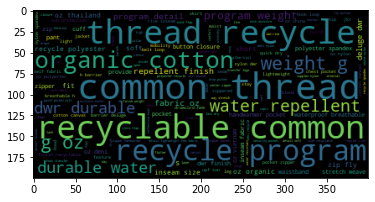

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_1)

# Show plot
plt.imshow(cloud)
plt.show()

In [31]:
#Ci-dessus les mots qui reviennent le plus pour le cluster 1

<B> CLUSTER 0

In [32]:
texts_0 = " ".join(dataset.loc[dataset['cluster_id']==0,'nlp_ready'])

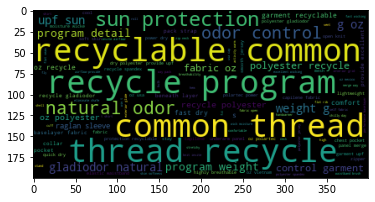

In [33]:
# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_0)

# Show plot
plt.imshow(cloud)
plt.show()

<B>CLUSTER 4

In [34]:
texts_4 = " ".join(dataset.loc[dataset['cluster_id']==4,'nlp_ready'])


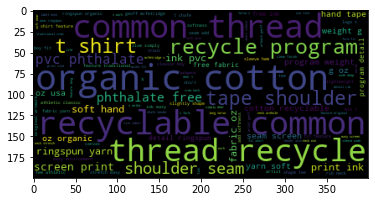

In [35]:
# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_4)

# Show plot
plt.imshow(cloud)
plt.show()

<B>CLUSTER 2

In [36]:
texts_2 = " ".join(dataset.loc[dataset['cluster_id']==2,'nlp_ready'])


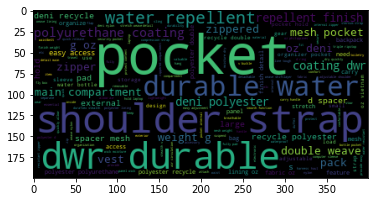

In [37]:
# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_2)

# Show plot
plt.imshow(cloud)
plt.show()

<B>CLUSTER 5

In [38]:
texts_5 = " ".join(dataset.loc[dataset['cluster_id']==5,'nlp_ready'])
texts_5[:400]

'fezzman shirt look fresh feel disheveled lightweight breathable recycle polyester organic cotton plain weave fezz win t wrinkle tight corner travel duffel recyclable common thread recycle program detail lightweight breathable recycle polyester organic cotton plain weave single chest pocket modest tail fabric oz recycle polyester organic cotton plain weave recyclable common thread recycle program w'

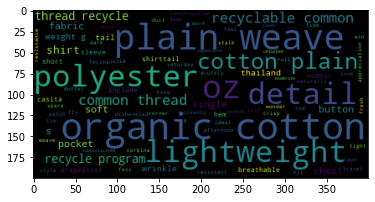

In [39]:
# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_5)

# Show plot
plt.imshow(cloud)
plt.show()

<B>CLUSTER 8

In [40]:
texts_8 = " ".join(dataset.loc[dataset['cluster_id']==8,'nlp_ready'])


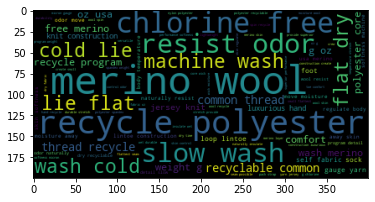

In [41]:
# Instanciate wordcloud
wd = WordCloud()

# Generate wordcloud 
cloud = wd.generate(texts_8)

# Show plot
plt.imshow(cloud)
plt.show()

<b> Part 2 - Création d'un systeme de recommandatation

The aim is to be able to suggest to a user some products that are similar to the ones he is interested in. To do this, we will consider that products belonging to the same cluster are similar.


In [42]:
def find_similar_items(item_id):
    cluster_id = dataset.loc[dataset['id']==item_id, 'cluster_id'].values[0]
    similar_items = dataset.loc[dataset['cluster_id']==cluster_id,:].sample(5)
    similar_item_ids = similar_items['id'].unique()
    return similar_item_ids

In [43]:
product_id = int(input("What product would you like to buy ? "))
print()
try:
    item_desc = dataset.loc[dataset['id']==product_id, 'description'].values[0]
except:
    print('Product not found in database. Please enter a valid product id.')
else:
    print("Product found in database, description below :")
    print(item_desc)
    print()
    
    print("Based on the analysis of the products' descriptions, you might also be interested by the following products : ")
    print()

    for i in find_similar_items(product_id):
        print("Item #", i)
        print(dataset.loc[dataset['id']==i, 'description'].values[0])
        print('--------------------')

What product would you like to buy ?  3



Product found in database, description below :
Active sport briefs - These superbreathable no-fly briefs are the minimalist's choice for high-octane endeavors. Made from a blend of fast-wicking, quick-drying 93% polyester (71% recycled) and 7% spandex that has both stretch-mesh (for support) and open mesh (for cooling airflow). Soft edging at the leg openings and a seamless waist won't roll or create friction against layers. With a smooth front panel for opacity. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch mesh provides support, open-weave mesh for airflow, wicks efficiently and dries fast"</li> <li>Seamless construction</li> <li>Leg openings have half-inch self-binding for comfort</li> <li>Fly-free support</li></ul><br><br><b>Fabric: </b>"4.6-oz 93% polyester (71% recycled)/7% spandex, with moisture-wicking performance. Recyclable through the Common Threads Recycling Program"<br><br><b>Weight: </b>(49 g 1.7 oz)<br><br>Made in Israe

<b> ATTENTION IL FAUDRAIT SUPPRIMER CLUSTER -1 du dataset

<b> Part 3 - Topic Modeling

The aim is to use an LSA model to automatically extract latent topics in the products' descriptions.
LSA = Latent Semantic Analysis / Method used for extracting and representing the contextual usage meaning of words by statistical computation applied to a large corpus of text
=> for discorvering the abstract topics that occur in a collection of document

In [44]:
# TruncatedSVD from sklearn
from sklearn.decomposition import TruncatedSVD

In [45]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)
lsa = svd_model.fit_transform(X)

In [46]:
columns = []
for i in range(1,16):
    topic = "topic_" + str(i)
    columns.append(topic)
columns

['topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8',
 'topic_9',
 'topic_10',
 'topic_11',
 'topic_12',
 'topic_13',
 'topic_14',
 'topic_15']

In [47]:
topic_encoded_df = pd.DataFrame(lsa, columns = columns)
topic_encoded_df["documents"] = dataset['clean_description']
topic_encoded_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,documents
0,0.278540,-0.044310,0.187993,0.096814,-0.112178,0.004933,-0.082275,-0.009869,-0.135849,-0.061235,-0.037080,-0.007953,0.075245,0.014038,-0.004499,active classic boxers there s a reason why our...
1,0.301939,-0.051697,0.103689,0.105425,-0.022103,0.146000,-0.025470,-0.007064,-0.089659,-0.099579,-0.065814,0.035766,0.092550,0.039509,0.074584,active sport boxer briefs skinning up glory re...
2,0.295555,-0.077520,0.112217,0.030728,-0.026981,0.129603,0.071744,0.074008,-0.069059,-0.033172,-0.044532,0.093146,0.107452,0.049941,0.088358,active sport briefs these superbreathable no f...
3,0.410757,-0.265319,-0.121433,-0.148646,0.039797,-0.019982,-0.045421,-0.111660,0.000717,-0.141630,-0.047129,-0.109291,0.154110,-0.111693,0.064679,alpine guide pants skin in climb ice switch to...
4,0.402754,-0.277850,-0.030544,-0.247182,-0.043890,-0.060429,0.036667,0.007016,0.097433,-0.160141,-0.017377,-0.202240,0.228530,0.218730,-0.051194,alpine wind jkt on high ridges steep ice and a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.343480,-0.072139,0.395308,0.085208,-0.243625,-0.038185,-0.132597,-0.079906,-0.312309,-0.077509,-0.090911,-0.050460,0.033179,0.004143,0.046734,cap bottoms cut loose from the maddening crowd...
496,0.378313,-0.068134,0.496734,-0.001105,-0.295544,-0.067604,-0.077571,0.017932,-0.251170,0.029876,-0.053991,-0.137262,-0.037285,0.098810,0.017590,cap crew this crew takes the edge off fickle w...
497,0.346885,-0.227446,-0.056207,-0.226476,-0.014824,-0.192436,0.060186,-0.175869,0.044899,0.059248,0.036498,0.048049,-0.105252,0.007238,-0.044331,all time shell no need to use that morning tim...
498,0.336582,0.072496,-0.137002,0.342638,0.045533,-0.114230,-0.178748,0.030788,-0.046260,0.034401,-0.003152,0.015319,-0.119417,0.160141,0.034987,all wear cargo shorts all wear cargo shorts ba...


In [48]:
df_valeur_absolue = topic_encoded_df.loc[:,topic_encoded_df.columns != 'documents']

In [49]:
df_valeur_absolue = np.abs(df_valeur_absolue)

In [50]:
df_valeur_absolue.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,0.278540,0.044310,0.187993,0.096814,0.112178,0.004933,0.082275,0.009869,0.135849,0.061235,0.037080,0.007953,0.075245,0.014038,0.004499
1,0.301939,0.051697,0.103689,0.105425,0.022103,0.146000,0.025470,0.007064,0.089659,0.099579,0.065814,0.035766,0.092550,0.039509,0.074584


In [51]:
df_valeur_absolue['main_topic'] = df_valeur_absolue.idxmax(axis=1)

In [52]:
df_valeur_absolue.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,main_topic
0,0.278540,0.044310,0.187993,0.096814,0.112178,0.004933,0.082275,0.009869,0.135849,0.061235,0.037080,0.007953,0.075245,0.014038,0.004499,topic_1
1,0.301939,0.051697,0.103689,0.105425,0.022103,0.146000,0.025470,0.007064,0.089659,0.099579,0.065814,0.035766,0.092550,0.039509,0.074584,topic_1


In [53]:
df_valeur_absolue['documents'] = topic_encoded_df["documents"]

In [54]:
df_valeur_absolue

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,main_topic,documents
0,0.278540,0.044310,0.187993,0.096814,0.112178,0.004933,0.082275,0.009869,0.135849,0.061235,0.037080,0.007953,0.075245,0.014038,0.004499,topic_1,active classic boxers there s a reason why our...
1,0.301939,0.051697,0.103689,0.105425,0.022103,0.146000,0.025470,0.007064,0.089659,0.099579,0.065814,0.035766,0.092550,0.039509,0.074584,topic_1,active sport boxer briefs skinning up glory re...
2,0.295555,0.077520,0.112217,0.030728,0.026981,0.129603,0.071744,0.074008,0.069059,0.033172,0.044532,0.093146,0.107452,0.049941,0.088358,topic_1,active sport briefs these superbreathable no f...
3,0.410757,0.265319,0.121433,0.148646,0.039797,0.019982,0.045421,0.111660,0.000717,0.141630,0.047129,0.109291,0.154110,0.111693,0.064679,topic_1,alpine guide pants skin in climb ice switch to...
4,0.402754,0.277850,0.030544,0.247182,0.043890,0.060429,0.036667,0.007016,0.097433,0.160141,0.017377,0.202240,0.228530,0.218730,0.051194,topic_1,alpine wind jkt on high ridges steep ice and a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.343480,0.072139,0.395308,0.085208,0.243625,0.038185,0.132597,0.079906,0.312309,0.077509,0.090911,0.050460,0.033179,0.004143,0.046734,topic_3,cap bottoms cut loose from the maddening crowd...
496,0.378313,0.068134,0.496734,0.001105,0.295544,0.067604,0.077571,0.017932,0.251170,0.029876,0.053991,0.137262,0.037285,0.098810,0.017590,topic_3,cap crew this crew takes the edge off fickle w...
497,0.346885,0.227446,0.056207,0.226476,0.014824,0.192436,0.060186,0.175869,0.044899,0.059248,0.036498,0.048049,0.105252,0.007238,0.044331,topic_1,all time shell no need to use that morning tim...
498,0.336582,0.072496,0.137002,0.342638,0.045533,0.114230,0.178748,0.030788,0.046260,0.034401,0.003152,0.015319,0.119417,0.160141,0.034987,topic_4,all wear cargo shorts all wear cargo shorts ba...


In [55]:
df_valeur_absolue['main_topic'].value_counts()

topic_1     265
topic_2      61
topic_3      36
topic_8      30
topic_7      27
topic_4      21
topic_12     16
topic_6      15
topic_11      8
topic_5       8
topic_15      7
topic_9       4
topic_14      2
Name: main_topic, dtype: int64

In [62]:
df_valeur_absolue.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,main_topic,documents
0,0.278540,0.044310,0.187993,0.096814,0.112178,0.004933,0.082275,0.009869,0.135849,0.061235,0.037080,0.007953,0.075245,0.014038,0.004499,topic_1,active classic boxers there s a reason why our...
1,0.301939,0.051697,0.103689,0.105425,0.022103,0.146000,0.025470,0.007064,0.089659,0.099579,0.065814,0.035766,0.092550,0.039509,0.074584,topic_1,active sport boxer briefs skinning up glory re...
2,0.295555,0.077520,0.112217,0.030728,0.026981,0.129603,0.071744,0.074008,0.069059,0.033172,0.044532,0.093146,0.107452,0.049941,0.088358,topic_1,active sport briefs these superbreathable no f...
3,0.410757,0.265319,0.121433,0.148646,0.039797,0.019982,0.045421,0.111660,0.000717,0.141630,0.047129,0.109291,0.154110,0.111693,0.064679,topic_1,alpine guide pants skin in climb ice switch to...
4,0.402754,0.277850,0.030544,0.247182,0.043890,0.060429,0.036667,0.007016,0.097433,0.160141,0.017377,0.202240,0.228530,0.218730,0.051194,topic_1,alpine wind jkt on high ridges steep ice and a...


On peut remarquer qu'une grande partie des produits est rattachée un thème principal

In [56]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names(), 
                                  index = ['topic_' + str(i+1) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yosemite,young,yvon,zinger,zip,zipper,zippered,zipping,zips,zone
topic_1,0.001122,0.002286,0.000377,0.018981,0.000787,0.000885,0.000892,0.001230,0.001316,0.001302,...,0.003083,0.000672,0.001527,0.000623,0.084134,0.105136,0.048943,0.001773,0.013095,0.007035
topic_2,0.000487,0.000814,0.000395,0.023082,0.000698,0.000872,0.000654,0.001811,0.001455,0.003761,...,0.006890,0.000484,0.004710,0.000865,0.049067,0.122306,0.058347,0.002657,0.019510,0.010363
topic_3,0.003493,0.006170,0.000023,0.018881,0.000063,0.000052,0.002150,0.001168,0.000537,0.000599,...,0.001474,0.000331,0.000725,0.000820,0.063683,0.063233,0.047436,0.001995,0.014089,0.000315
topic_4,0.000583,0.000275,0.000083,0.012607,0.000906,0.001964,0.000212,0.003417,0.000092,0.002115,...,0.005622,0.001135,0.003254,0.000826,0.099546,0.132114,0.047031,0.004700,0.027084,0.016267
topic_5,0.004259,0.009313,0.000760,0.017587,0.000657,0.000369,0.001959,0.000741,0.000185,0.000110,...,0.000269,0.000159,0.000495,0.000409,0.018101,0.011064,0.011013,0.000586,0.004881,0.019966


In [57]:
# Loop over each topic and print the 5 most important words
for i,row in topics_description.iterrows():
    print('TOPIC :', i)
    print(row.sort_values(ascending=False)[0:5].index.tolist())
    print()
    print('-------------------------')
    print()

TOPIC : topic_1
['recycle', 'pocket', 'oz', 'organic', 'cotton']

-------------------------

TOPIC : topic_2
['organic', 'cotton', 'shirt', 'print', 'ringspun']

-------------------------

TOPIC : topic_3
['merino', 'odor', 'pocket', 'wool', 'control']

-------------------------

TOPIC : topic_4
['inseam', 'organic', 'cotton', 'button', 'short']

-------------------------

TOPIC : topic_5
['merino', 'wool', 'wash', 'sun', 'capilene']

-------------------------

TOPIC : topic_6
['nylon', 'spandex', 'sun', 'organic', 'cotton']

-------------------------

TOPIC : topic_7
['spandex', 'coverage', 'tencel', 'inseam', 'pocket']

-------------------------

TOPIC : topic_8
['strap', 'waterproof', 'mesh', 'barrier', 'polyurethane']

-------------------------

TOPIC : topic_9
['sun', 'upf', 'protection', 'collar', 'fleece']

-------------------------

TOPIC : topic_10
['fleece', 'waterproof', 'sun', 'protection', 'barrier']

-------------------------

TOPIC : topic_11
['photo', 'poster', 'outside